<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/checkpoint_knn_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

Implement KNN from scratch 

The test problem we will be using in this tutorial is the iris classification.

The problem consists of 150 observations of iris flowers from three different species. There are 4 measurements of given flowers: sepal length, sepal width, petal length, and petal width (all in the same unit of centimeters). The predicted attribute is the species, which is either Setosa, Versicolor, or Virginica.

It is a standard dataset where the species is known for all instances. As such we can split the data into training and test datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct (typically 96% or better).

Save the file in your current working directory with the file name “iris.data“.

This tutorial is broken down into the following steps:

Handle Data: Open the dataset from CSV and split it into test/train datasets.

Similarity: Calculate the distance between two data instances.

Neighbors: Locate k for most similar data instances.

Response: Generate a response from a set of data instances.

Accuracy: Summarize the accuracy of predictions.

Main: Tie it all together.

**1. Handle Data**

The first thing we need to do is load our data file. 
```
import csv 
with open('iris.data.txt', 'r') as csvfile :
  lines = csv.reader(csvfile)

  for row in lines :
    print (', '.join(row))

```

Next we need to split the data into a training dataset 
```
import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

with open(filename, 'r') as csvfile:

  lines = csv.reader(csvfile)

  dataset = list(lines)

  for x in range(len(dataset)-1):

    for y in range(4):

      dataset[x][y] = float(dataset[x][y])

    if random.random() < split:

      complete code

    else:

      complete code

We can test this function out with our iris dataset, as follows:

trainingSet=[]

testSet=[]

loadDataset('iris.data', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )
```
**2. Similarity**

To make predictions we need to calculate the similarity between any two given data instances. This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn, make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the Euclidean distance measure. 

Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a fixed length, ignoring the final dimension.

Putting all of this together, you have to define the Euclidean distance
```
import math

def euclideanDistance(instance1, instance2, length):

      Complete the function
```
Note here that 

The number of elements in the instance1 equals the number of elements in the instance2 

The length refers to the number of elements in the instance1 

We can test this function with some sample data, as follows:
```
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print 'Distance: ' + repr(distance)
```
**3. Neighbors**

Now that we have a similarity measure, we can use it to collect the k most similar instances for a given unseen instance.

This is a straightforward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)
```
import operator

def getNeighbors(trainingSet, testInstance, k):

distances = []

length = len(testInstance)-1

for x in range(len(trainingSet)):

dist = euclideanDistance(testInstance, trainingSet[x], length)

distances.append((trainingSet[x], dist))

distances.sort(key=operator.itemgetter(1))

neighbors = []

for x in range(k):

neighbors.append(distances[x][0])

return neighbors

We can test out this function as follows:

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)
```

**4. Response**

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, and taking the majority vote as the prediction.

Below is a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.
```
import operator

def getResponse(neighbors):

classVotes = {}

for x in range(len(neighbors)):

response = neighbors[x][ ? ] #complete with appropriate number

if response in classVotes:

Complete the if clause

sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

return sortedVotes[0][0]

We can test out this function with some test neighbors, as follows:

neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)
```
This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an unbiased random response.

**5. Accuracy**

We have all of the pieces of the KNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.
```
def getAccuracy(testSet, predictions):

Complete the function

return (correct/float(len(testSet))) * 100.0

We can test this function with a test dataset and predictions, as follows:

testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)
```
**6. Main**

We now have all the elements of the algorithm and  you can put them all in one main function

**7. Another distance metric**

In this part, you are asked to define another distance metric in addition to the Euclidean distance.

In [1]:
from google.colab import files

files.upload()

Saving iris.data.txt to iris.data.txt


{'iris.data.txt': b'5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3.0,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5.0,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5.0,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3.0,1.4,0.1,Iris-setosa\r\n4.3,3.0,1.1,0.1,Iris-setosa\r\n5.8,4.0,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1.0,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5.0,3.0,1.6,0.2,Iris-setosa\r\n5.0,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.6,0.2,Iris-setosa\r\n5.4,3.4,1.5,0.4,Iri

In [2]:
files.view('/content/iris.data.txt') 

<IPython.core.display.Javascript object>

# 1. Handle Data

The first thing we need to do is load our data file.
```
import csv

with open('iris.data.txt', 'r') as csvfile:

lines = csv.reader(csvfile)

for row in lines :

print (', '.join(row))
```
Next we need to split the data into a training dataset
```
import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):

with open(filename, 'r') as csvfile:

lines = csv.reader(csvfile)

dataset = list(lines)

for x in range(len(dataset)-1):

for y in range(4):

  dataset[x][y] = float(dataset[x][y])

if random.random() < split:

  complete code

else:

  complete code
We can test this function out with our iris dataset, as follows:

trainingSet=[]

testSet=[]

loadDataset('iris.data', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )
```

### Charger notre fichier de données 

In [3]:
import csv 
with open('iris.data.txt', 'r') as csvfile :
  lines = csv.reader(csvfile)

  for row in lines :
    print (', '.join(row))



5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

## split the data into a training dataset

In [4]:
import csv

import random

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    ''' Fait le split de données de training d'un fichier csv '''
    with open(filename, 'r') as csvfile:

      lines = csv.reader(csvfile)

      dataset = list(lines)

      for x in range(len(dataset)-1):

        for y in range(4):

          dataset[x][y] = float(dataset[x][y])

        if random.random() < split:

          #complete code
          trainingSet.append(dataset[x])

        else:

          #   complete code
          testSet.append(dataset[x])

# We can test this function out with our iris dataset, as follows:
        

trainingSet=[]

testSet=[]

loadDataset('iris.data.txt', 0.66, trainingSet, testSet)

print ('Train: ' + repr(len(trainingSet)))

print ('Test: ' + repr(len(testSet)) )

Train: 103
Test: 46


#**2. Similarity**

To make predictions we need to calculate the similarity between any two given data instances. This is needed so that we can locate the k most similar data instances in the training dataset for a given member of the test dataset and in turn, make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the Euclidean distance measure. 

Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the Euclidean distance to a fixed length, ignoring the final dimension.

Putting all of this together, you have to define the Euclidean distance
```
import math

def euclideanDistance(instance1, instance2, length):

      Complete the function
```
Note here that 

The number of elements in the instance1 equals the number of elements in the instance2 

The length refers to the number of elements in the instance1 

We can test this function with some sample data, as follows:
```
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print 'Distance: ' + repr(distance)
```

### Distance euclidienne 

In [5]:
import math

def euclideanDistance(instance1, instance2, length):
  ''' Calcul la distance euclidienne entre instance1 et instance2 : 
   d = √ somme( (instance1(x) − instance2(x) )**2 ) pour chaque x dans length '''
  distance = 0
  for x in range(length):
    distance += pow((instance1[x] - instance2[x]), 2)
  return math.sqrt(distance)

Test de la fonction

In [6]:
data1 = [2, 2, 2, 'a']

data2 = [4, 4, 4, 'b']

distance = euclideanDistance(data1, data2, 3)

print(f'Distance: {repr(distance)}')

Distance: 3.4641016151377544


# **3. Neighbors**

Now that we have a similarity measure, we can use it to collect the k most similar instances for a given unseen instance.

This is a straightforward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the getNeighbors function that returns k most similar neighbors from the training set for a given test instance (using the already defined euclideanDistance function)
```
import operator

def getNeighbors(trainingSet, testInstance, k):

distances = []

length = len(testInstance)-1

for x in range(len(trainingSet)):

dist = euclideanDistance(testInstance, trainingSet[x], length)

distances.append((trainingSet[x], dist))

distances.sort(key=operator.itemgetter(1))

neighbors = []

for x in range(k):

neighbors.append(distances[x][0])

return neighbors
```
We can test out this function as follows:
```
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print(neighbors)
```

### obtenir ses proches voisin

In [7]:
import operator

def getNeighbors(trainingSet, testInstance, k):

  distances = []

  length = len(testInstance)-1

  for x in range(len(trainingSet)):

    dist = euclideanDistance(testInstance, trainingSet[x], length)

    distances.append((trainingSet[x], dist))

    distances.sort(key=operator.itemgetter(1))

    neighbors = []

  for x in range(k):

    neighbors.append(distances[x][0])

  return neighbors

### Test de la fonction

In [8]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]

testInstance = [5, 5, 5]

k = 1

neighbors = getNeighbors(trainSet, testInstance, 1)

print("dans [[2, 2, 2, 'a'], [4, 4, 4, 'b']],\nPour k = 1 , [5, 5, 5] est voisin à ", neighbors)

dans [[2, 2, 2, 'a'], [4, 4, 4, 'b']],
Pour k = 1 , [5, 5, 5] est voisin à  [[4, 4, 4, 'b']]


# **4. Response**

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute, and taking the majority vote as the prediction.

Below is a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.
```
import operator

def getResponse(neighbors):

classVotes = {}

for x in range(len(neighbors)):

response = neighbors[x][ ? ] #complete with appropriate number

if response in classVotes:

Complete the if clause

sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

return sortedVotes[0][0]
```
We can test out this function with some test neighbors, as follows:
```
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)
```
This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an unbiased random response.


In [9]:
import operator

def getResponse(neighbors):
  ''' Créer une liste de tous les voisins possibles '''

  classVotes = {}

  for x in range(len(neighbors)):
    # la reponse contient le dernier élément de la liste  soit list[x][-1]
    response = neighbors[x][-1] #complete with appropriate number

    if response in classVotes:
      classVotes[response] += 1
    else:
      classVotes[response] = 1

  sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)

  return sortedVotes[0][0]



In [10]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

response = getResponse(neighbors)

print(response)

a


#**5. Accuracy**

We have all of the pieces of the KNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called classification accuracy.

Below is the getAccuracy function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications.
```
def getAccuracy(testSet, predictions):

Complete the function

return (correct/float(len(testSet))) * 100.0
```
We can test this function with a test dataset and predictions, as follows:
```
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print(accuracy)
```

Créer la fonction getAccuracy : renvoie le pourcentage de score prédit si les données de test est égal aux données prédictes

In [11]:
def getAccuracy(testSet, predictions):
  '''Calcul la métric du KNN accuracy en %'''
  #Complete the function
  correct = 0
  for x in range(len(testSet)):
    if testSet[x][-1] == predictions[x]:
      correct += 1

  return (correct/float(len(testSet))) * 100.0

Tester la fonction getAccuracy 

In [12]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]

predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)

print("predictions = ['a', 'a', 'a'] parmis les voisins testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']] est de ", accuracy,"%")

predictions = ['a', 'a', 'a'] parmis les voisins testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']] est de  66.66666666666666 %


# 6. Main

We now have all the elements of the algorithm and you can put them all in one main function

Créer une fonction main pour génerer notre modèl de KNN

In [53]:
def main(distance):
    # plit data 
    trainingSet=[]
    testSet=[]
    split = 0.67
    # load dataset
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)) )
    print('Test set: ' + repr(len(testSet))  )   
    # initialize prediction data and k value
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        # search neighbors for k specific value 
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        # get the k nearest neighbors 
        result = getResponse(neighbors)
        # implement prediction data 
        predictions.append(result)
        print('\n')
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        print('\n')
        print(f'> Distance {distance.__name__} de {trainingSet[x]} à {testSet[x]} pour k={k} : '+ str(distance(trainingSet[x], testSet[x], k)))
        print('\n')
    # calcul metrics
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ', accuracy)
main(euclideanDistance)

Train set: 94
Test set: 55


> predicted='Iris-setosa', actual='Iris-setosa'


> Distance euclideanDistance de [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'] à [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'] pour k=3 : 0.5385164807134502




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance euclideanDistance de [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'] à [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'] pour k=3 : 0.24494897427831802




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance euclideanDistance de [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'] à [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'] pour k=3 : 0.5830951894845302




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance euclideanDistance de [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'] à [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'] pour k=3 : 0.4123105625617664




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance euclideanDistance de [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'] à [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'] pour k=3 : 0.5477225575051662




> predicted='Iris-se

7. Another distance metric

In this part, you are asked to define another distance metric in addition to the Euclidean distance.

# Manhattan distance

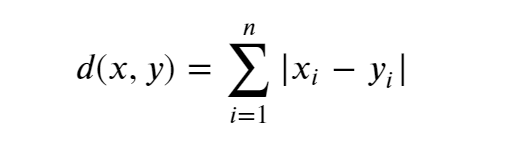

In [54]:
def ManhattanDistance(instance1, instance2, length):
  ''' Calcul la distance Manhattan entre instance1 et instance2 : 
   d = somme( |(instance1(x) − instance2(x) )|) pour chaque x dans length '''
  distance = 0
  for x in range(length):
    distance += abs((instance1[x] - instance2[x]))
  return distance

In [55]:
main(ManhattanDistance)

Train set: 113
Test set: 36


> predicted='Iris-setosa', actual='Iris-setosa'


> Distance ManhattanDistance de [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'] à [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'] pour k=3 : 0.6999999999999993




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance ManhattanDistance de [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'] à [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'] pour k=3 : 0.4000000000000006




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance ManhattanDistance de [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'] à [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'] pour k=3 : 1.0000000000000002




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance ManhattanDistance de [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'] à [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'] pour k=3 : 0.5000000000000004




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance ManhattanDistance de [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'] à [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'] pour k=3 : 1.0999999999999996




> predicted='Iris-se

# Minkowski distance

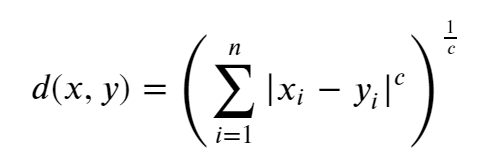

In [58]:
def MinkowskiDistance(instance1, instance2, length):
  ''' Calcul la distance Manhattan entre instance1 et instance2 : 
   d = (somme( |(instance1(x) − instance2(x) )**c|))**(1/c) pour chaque x dans length '''
  distance = 0
  c= 2 #par défaut on choisi prendre c=2
  for x in range(length):
    distance += abs((instance1[x] - instance2[x])**c)
  return distance**(1/c)

In [59]:
main(MinkowskiDistance)

Train set: 110
Test set: 39


> predicted='Iris-setosa', actual='Iris-setosa'


> Distance MinkowskiDistance de [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'] à [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'] pour k=3 : 0.5385164807134502




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance MinkowskiDistance de [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'] à [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'] pour k=3 : 0.4358898943540674




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance MinkowskiDistance de [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'] à [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'] pour k=3 : 1.0000000000000007




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance MinkowskiDistance de [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'] à [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'] pour k=3 : 0.24494897427831747




> predicted='Iris-setosa', actual='Iris-setosa'


> Distance MinkowskiDistance de [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'] à [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'] pour k=3 : 0.5




> predicted='Iris-setosa', actual=